In [237]:
import pandas as pd
import numpy as np

In [238]:
data=pd.read_csv(r"C:\Users\KHU\Desktop\투빅스 과제\1주차\IMM_data.csv")

In [239]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 1. 결측치 검토

In [240]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# 2. 이상치 검토

## 수치형, 범주형 구분

In [241]:
cols=list(data.columns)

In [242]:
print("고유값 수")
for column in data.columns:
    print(f"{column}: {data[column].nunique()}")

고유값 수
Age: 43
Attrition: 2
BusinessTravel: 3
DailyRate: 886
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeNumber: 1470
EnvironmentSatisfaction: 4
Gender: 2
HourlyRate: 71
JobInvolvement: 4
JobLevel: 5
JobRole: 9
JobSatisfaction: 4
MaritalStatus: 3
MonthlyIncome: 1349
MonthlyRate: 1427
NumCompaniesWorked: 10
Over18: 1
OverTime: 2
PercentSalaryHike: 15
PerformanceRating: 2
RelationshipSatisfaction: 4
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 40
TrainingTimesLastYear: 7
WorkLifeBalance: 4
YearsAtCompany: 37
YearsInCurrentRole: 19
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18


### 고유값 1개인 특성 제거

In [243]:
for i in cols:
    if(data[i].nunique()==1):
        cols.remove(i)
data=data[cols]

### 범주형 변수 찾기

In [244]:
object_col=[]
for col in cols:
    if(data[col].dtype==object and data[col].nunique()<=30):
        object_col.append(col)
        print(col, data[col].nunique())

Attrition 2
BusinessTravel 3
Department 3
EducationField 6
Gender 2
JobRole 9
MaritalStatus 3
OverTime 2


### 수치형 변수 찾기

In [245]:
order_col=[]
for col in cols:
    if(data[col].dtype!=object and data[col].nunique()<30):
        order_col.append(col)
        print(col, data[col].nunique())

DistanceFromHome 29
Education 5
EnvironmentSatisfaction 4
JobInvolvement 4
JobLevel 5
JobSatisfaction 4
NumCompaniesWorked 10
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StockOptionLevel 4
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [246]:
cont_col=list(set(cols)-set(object_col)-set(order_col))

In [247]:
print("명목형 : ", object_col)
print("순서형 : ", order_col)
print("연속형 : ", cont_col)

명목형 :  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
순서형 :  ['DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
연속형 :  ['YearsAtCompany', 'MonthlyIncome', 'DailyRate', 'Age', 'MonthlyRate', 'TotalWorkingYears', 'HourlyRate', 'EmployeeNumber']


## 연속형 변수 이상치 확인 (박스 플롯)

In [248]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in object_col:
    data[i]=label_encoder.fit_transform(data[i])

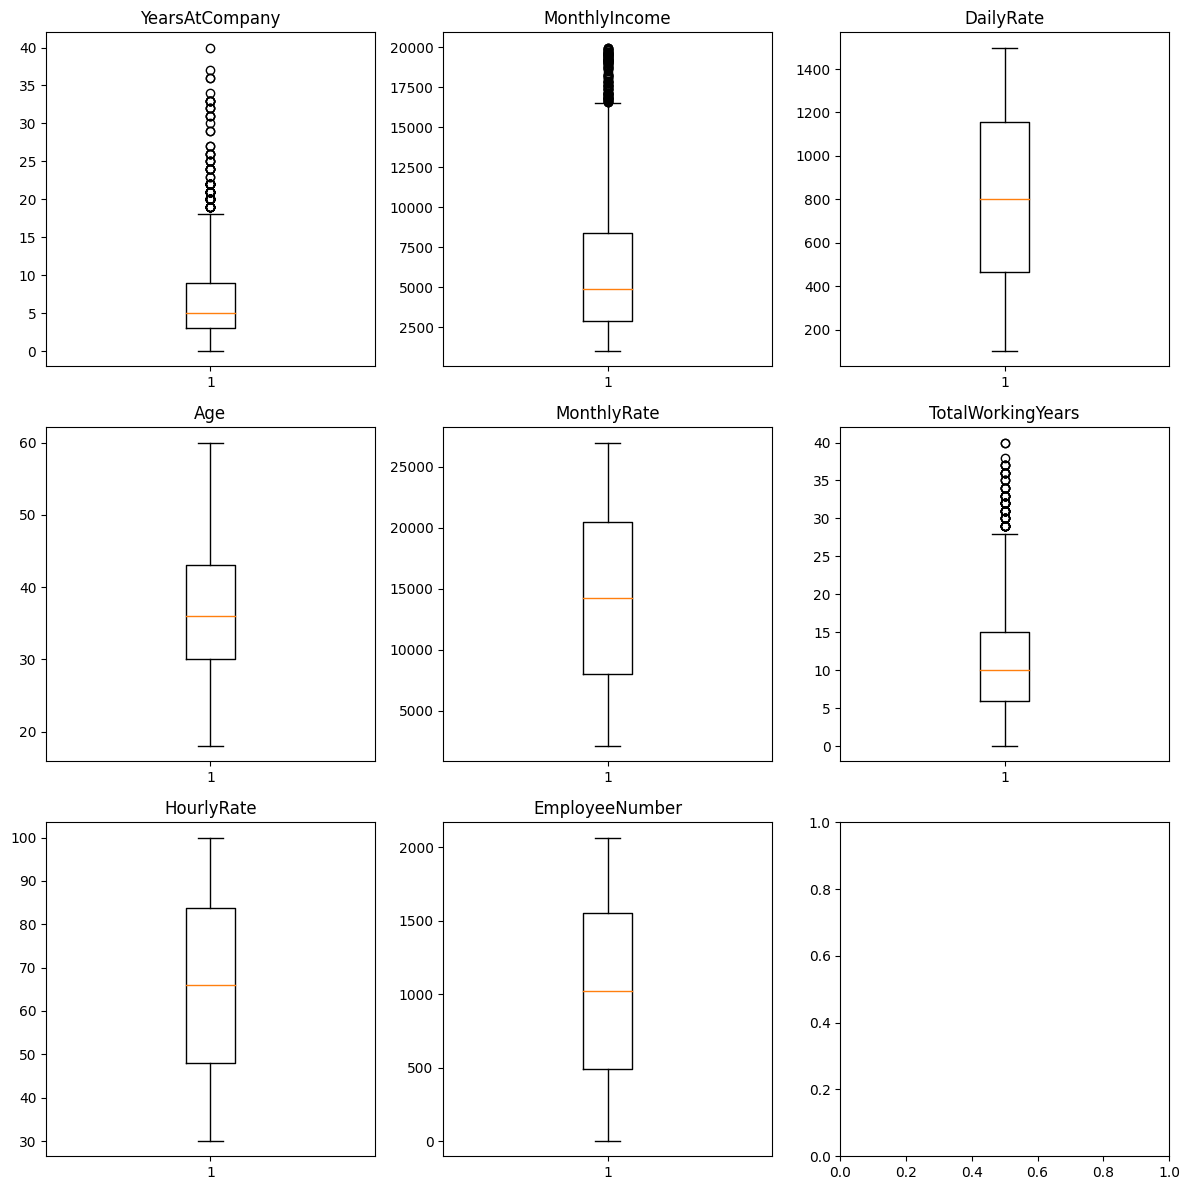

In [249]:
import matplotlib.pyplot as plt

num_variables = len(cont_col)
num_rows = num_variables // 3 + (num_variables % 3 > 0)
num_cols = min(3, num_variables)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

for i, variable in enumerate(cont_col):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].boxplot(data[variable])
    axes[row_idx, col_idx].set_title(variable)

plt.tight_layout()
plt.show()


In [250]:
def remove_outliers_iqr(data, variable, k=1.5):
    q1 = np.percentile(data[variable], 25)
    q3 = np.percentile(data[variable], 75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    
    filtered_data = data[(data[variable] >= lower_bound) & (data[variable] <= upper_bound)]
    return filtered_data

In [251]:
for i in cont_col:
    data=remove_outliers_iqr(data, i)

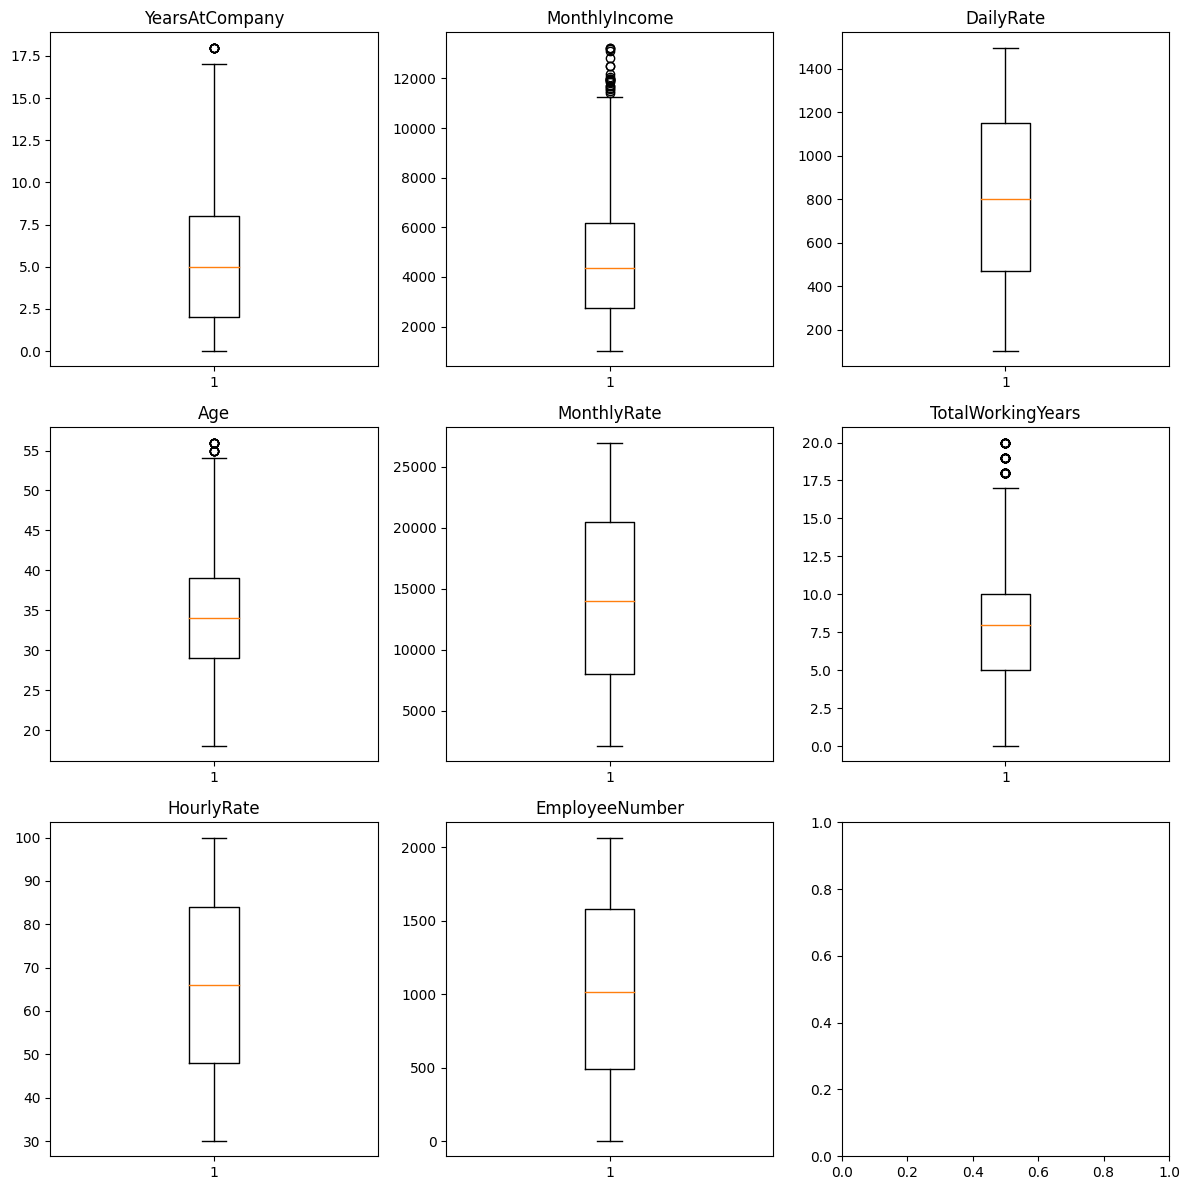

In [252]:
import matplotlib.pyplot as plt

num_variables = len(cont_col)
num_rows = num_variables // 3 + (num_variables % 3 > 0)
num_cols = min(3, num_variables)

# 서브플롯 생성
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

for i, variable in enumerate(cont_col):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].boxplot(data[variable])
    axes[row_idx, col_idx].set_title(variable)

plt.tight_layout()
plt.show()


# 3. EDA

## 명목형 변수 시각화 (object_col)

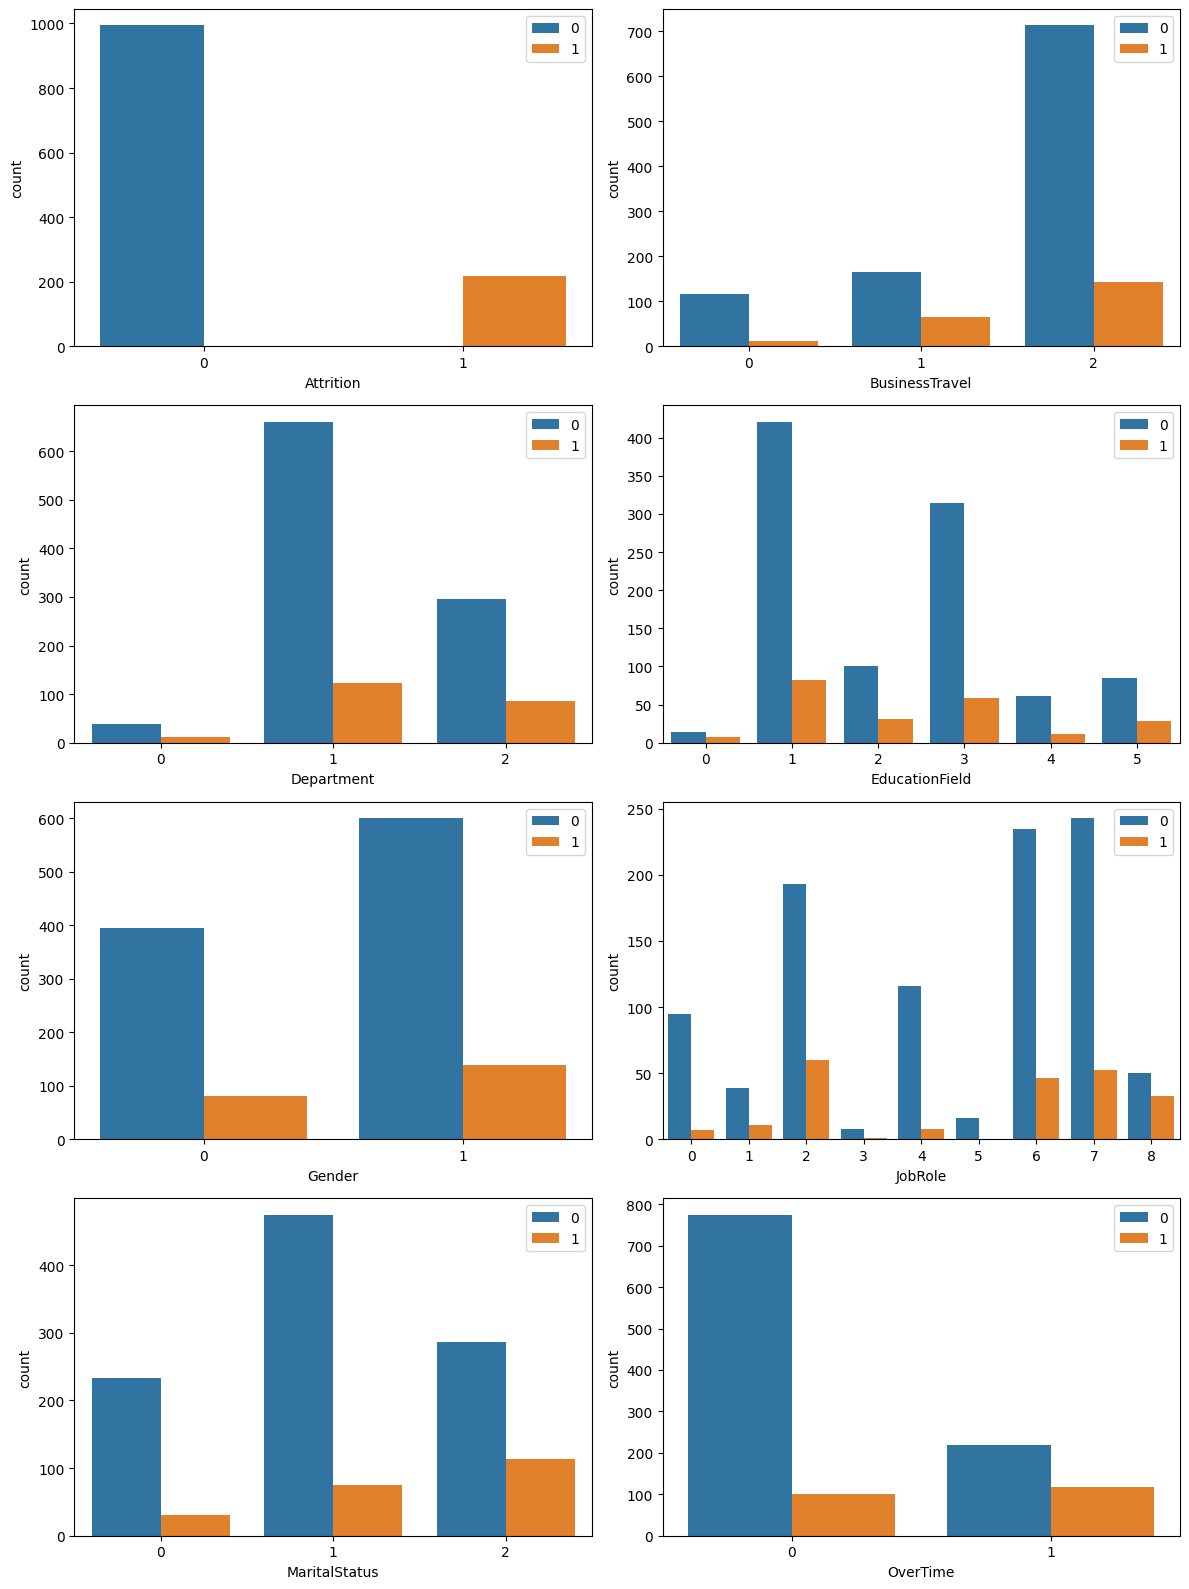

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

# 특성 수에 맞춰서 서브 플롯 행, 열 계산
num_variables = len(object_col)
num_rows = num_variables // 2 + (num_variables % 2 > 0)
num_cols = min(2, num_variables)

# 서브 플롯 생성
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

# 특성 돌면서 시각화
for i, col in enumerate(object_col):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # 특성마다 countplot 시각화
    sns.countplot(x=col, hue='Attrition', data=data, ax=axes[row_idx, col_idx])
    
    # 범례 위치 설정
    axes[row_idx, col_idx].legend(loc='upper right')

plt.tight_layout()
plt.show()


## 순서형 변수 시각화 (order_col)

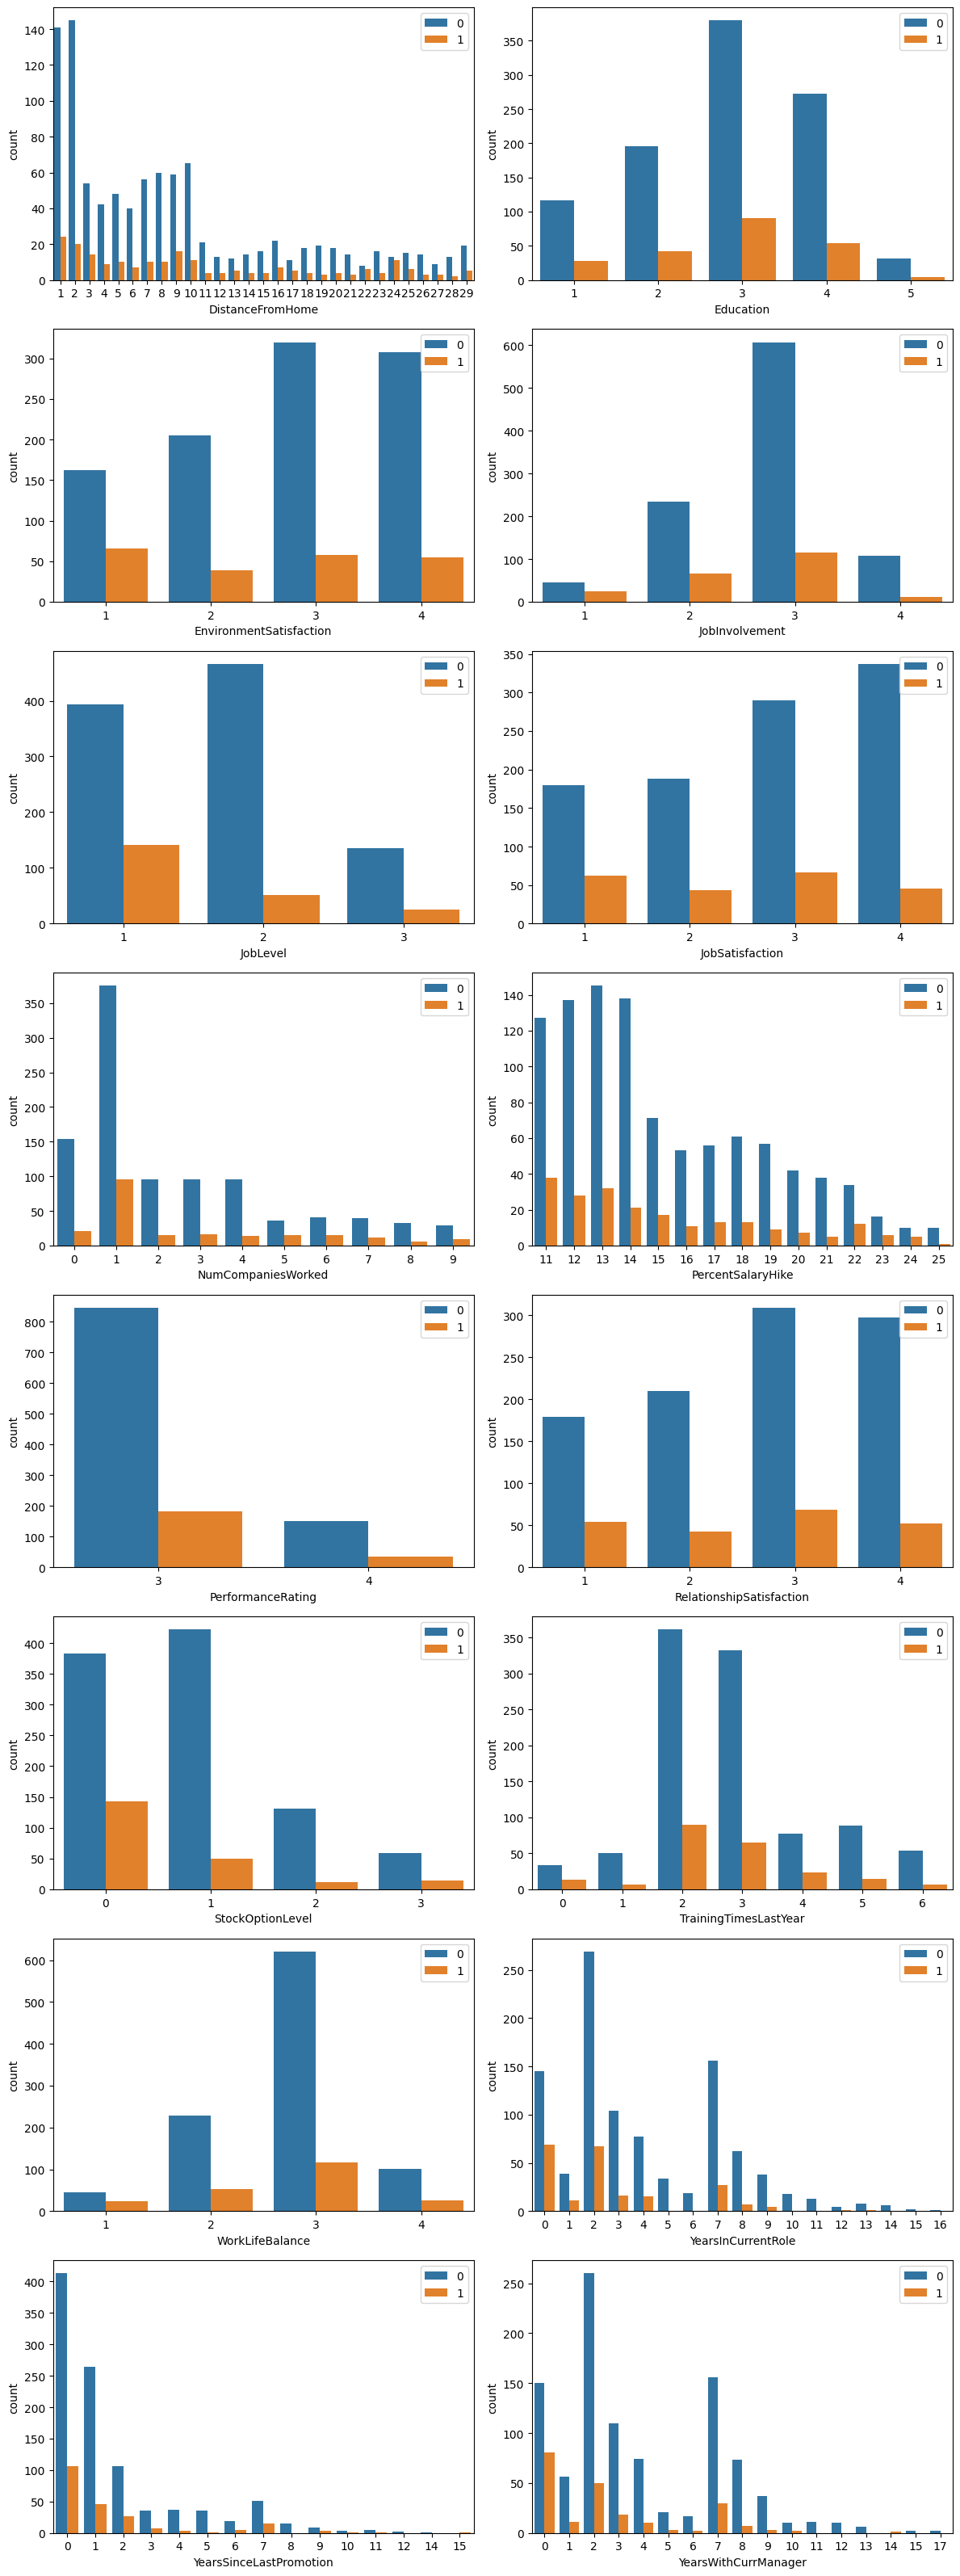

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

# 특성 수에 맞춰서 서브 플롯 행, 열 계산
num_variables = len(order_col)
num_rows = num_variables // 2 + (num_variables % 2 > 0)
num_cols = min(2, num_variables)

# 서브 플롯 생성
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

# 특성 돌면서 시각화
for i, col in enumerate(order_col):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # 특성마다 countplot 시각화
    sns.countplot(x=col, hue='Attrition', data=data, ax=axes[row_idx, col_idx])
    
    # 범례 위치 설정
    axes[row_idx, col_idx].legend(loc='upper right')

plt.tight_layout()
plt.show()


## 연속형 변수 시각화 (cont_col)

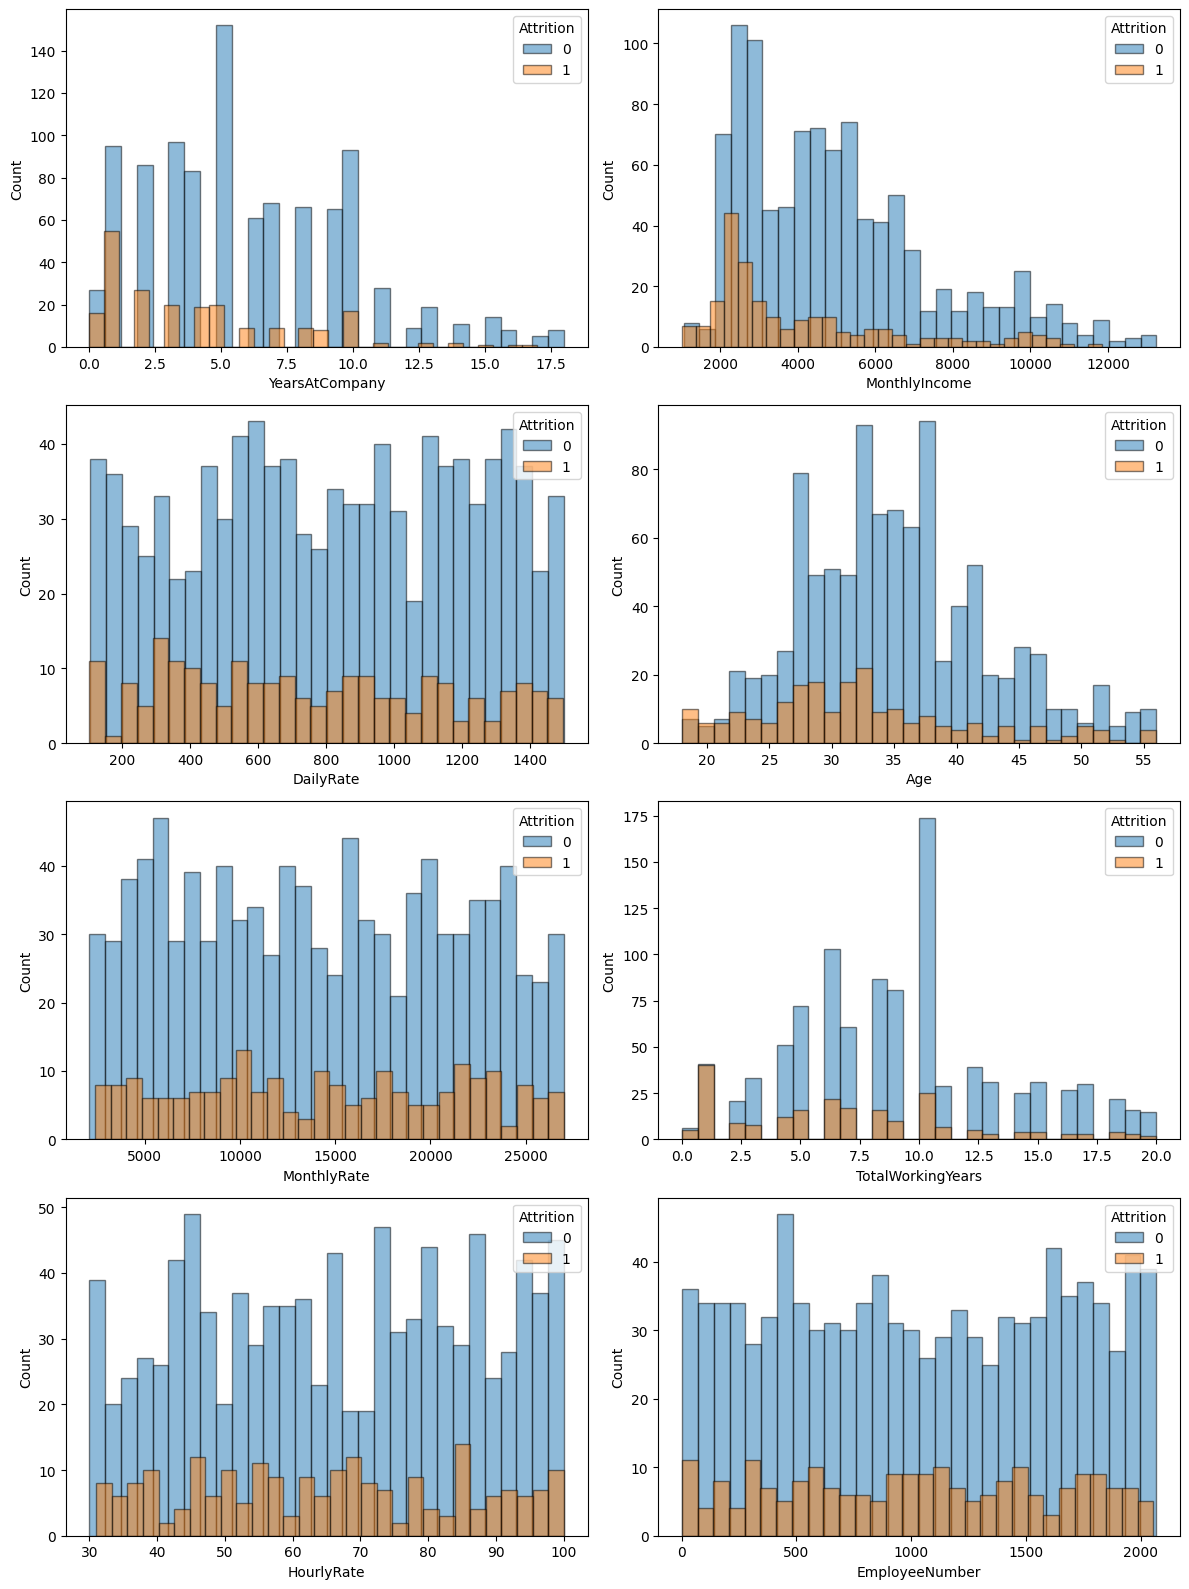

In [255]:
import matplotlib.pyplot as plt

num_variables = len(cont_col)
num_rows = num_variables // 2 + (num_variables % 2 > 0)
num_cols = min(2, num_variables)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

for i, col in enumerate(cont_col):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    axes[row_idx, col_idx].hist(data.loc[data['Attrition'] == 0, col].dropna(), bins=30, alpha=0.5, label='0', edgecolor='black')
    axes[row_idx, col_idx].hist(data.loc[data['Attrition'] == 1, col].dropna(), bins=30, alpha=0.5, label='1', edgecolor='black')

    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Count')
    axes[row_idx, col_idx].legend(title='Attrition',loc='upper right')

plt.tight_layout()
plt.show()


- Attrition과 관계없어보이는 특성

`EnvironmentSatisfaction` (환경 만족도)

`JobSatisfaction` (직무 만족도)

`PerformanceRating` (성과 평가)

`RelationshipSatisfaction` (대인관계 만족도)

- 주요 특성

`JobLevel` (직급), `MonthlyIncome`(월급), `YearAtCompany` (근속 연수), `TotalWorkingYears` (총 근무 연수)가 낮을 수록 그만둘 확률 상승

`BusinessTravel` (출장 여부) : 많이 다닐 수록 그만둘 확률 상승

`Department` (부서) : 특정 부서의 경우 더 많이 그만둠

`EducationField` (교육 분야) : 특정 분야의 경우 더 많이 그만둠

`Gender` (성별) : 남자가 여자보다 더 많이 그만둠

`JobRole` (직무) : 특정 직무의 경우 더 많이 그만둠

`MaritalStatus` (결혼 여부) : 결혼하지 않은 사람이 그렇지 않은 사람들보다 더 많이 그만둠

`OverTime` (초과 근무 여부) : 초과 근무를 할수록 더 많이 그만둠

# 4. 변수간의 상관관계

In [256]:
import pandas as pd

corr_matrix = data.corr()

high_correlation = set()
high_pair=[]
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        # 편의상 상관계수 0.75 이상인 특성만 고려함
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            high_correlation.add(corr_matrix.columns[i])
            high_correlation.add(corr_matrix.columns[j])
            high_pair.append((corr_matrix.columns[i], corr_matrix.columns[j]))

corr_matrix=data[list(high_correlation)].corr()

- 히트맵

<AxesSubplot:>

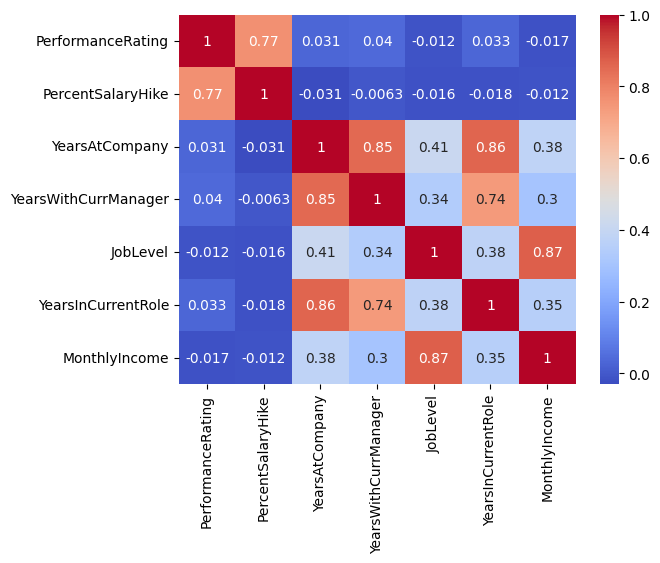

In [257]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

- pairplot

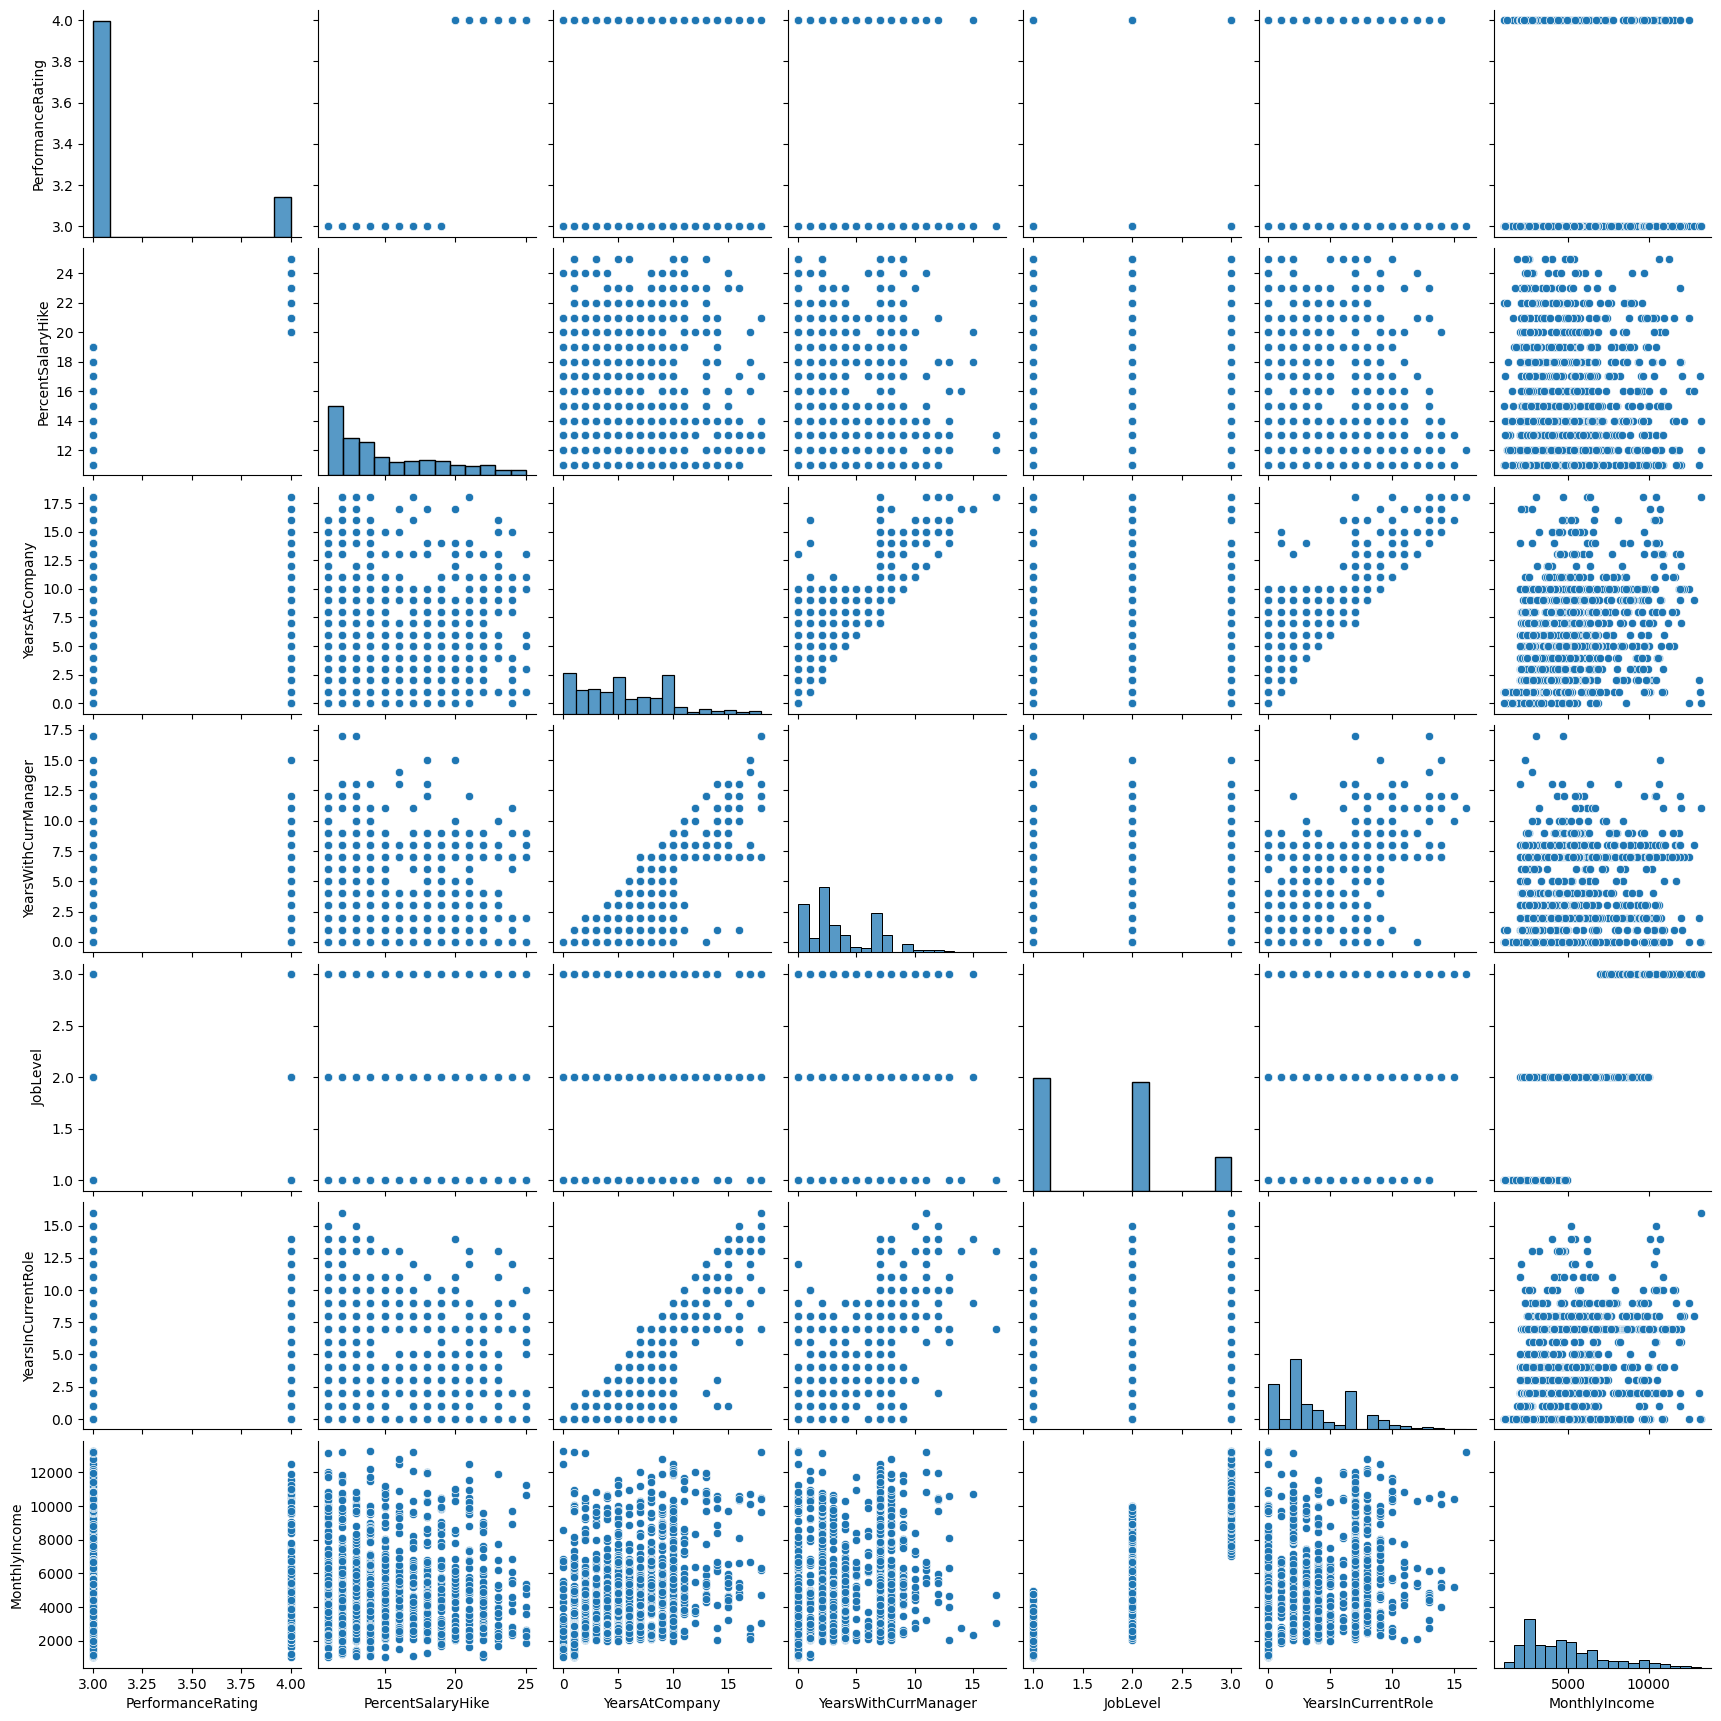

In [258]:
sns.pairplot(data[list(high_correlation)], diag_kind='hist')

- 상관계수 0.75 이상인 특성 조합으로만 scatter

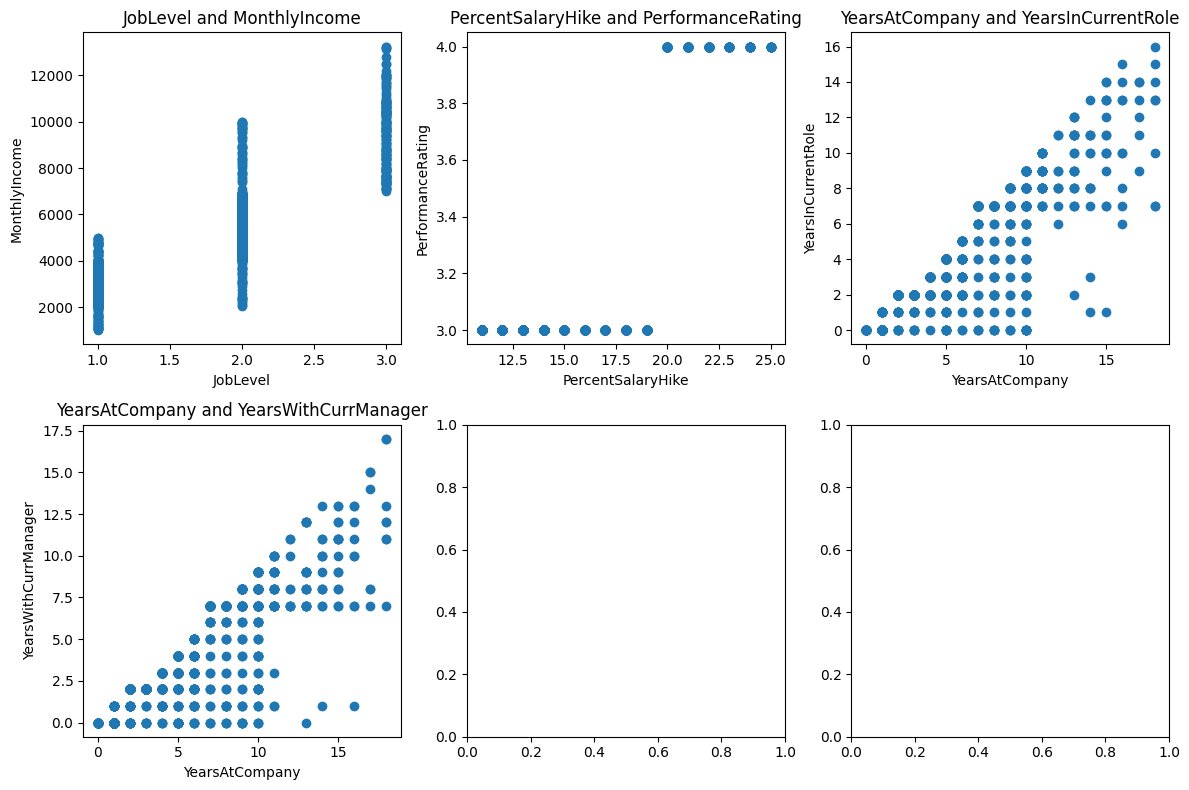

In [259]:
import matplotlib.pyplot as plt

num_pairs = len(high_pair)
num_rows = num_pairs // 3 + (num_pairs % 3 > 0)
num_cols = min(3, num_pairs)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 4*num_rows))

for i, pair in enumerate(high_pair):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.scatter(data[pair[0]], data[pair[1]])
    ax.set_title(f'{pair[0]} and {pair[1]}')
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])
plt.tight_layout()
plt.show()


`jobLevlevel`과 `MonthlyIncome`간의 양의 상관관계

`PercentSalaryHike`와 `PerformanceRating`의 특정 임계값의 관계

`YearsAtCompany`, `YearsInCurrentRole`의 양의 상관관계

`YearsAtCompany`, `YearsWithCurrManager`의 양의 상관관계

# 파생변수

## 총 만족도

In [260]:
data['TotalSatisfaction_mean'] = (data['RelationshipSatisfaction']  + data['EnvironmentSatisfaction'] + data['JobSatisfaction'] + data['JobInvolvement'] + data['WorkLifeBalance'])/5

<AxesSubplot:xlabel='TotalSatisfaction_mean', ylabel='count'>

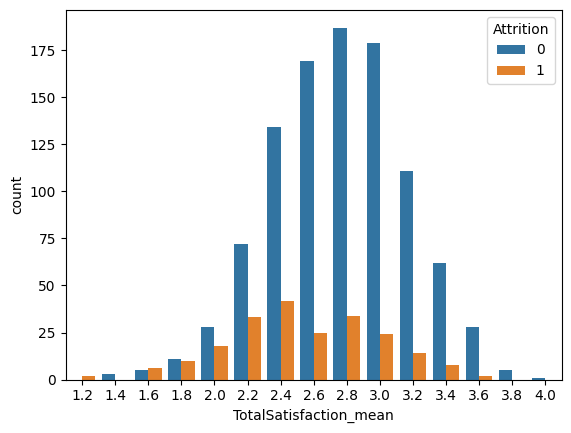

In [261]:
sns.countplot(x='TotalSatisfaction_mean', hue='Attrition', data=data)